In [2]:
# !pip install -r /work/NLP_IMDb_Exam/requirements.txt
import numpy as np
import pandas as pd
import torch
import datasets
import evaluate
import seaborn as sns
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification, AutoModel
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorForTokenClassification
from sentence_transformers import SentenceTransformer

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 22.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 38.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 44.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 62.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 50.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 39.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 27.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 59.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 M

2024-12-30 21:41:32.126224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735591292.147381   34940 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735591292.153618   34940 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-30 21:41:32.195875: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


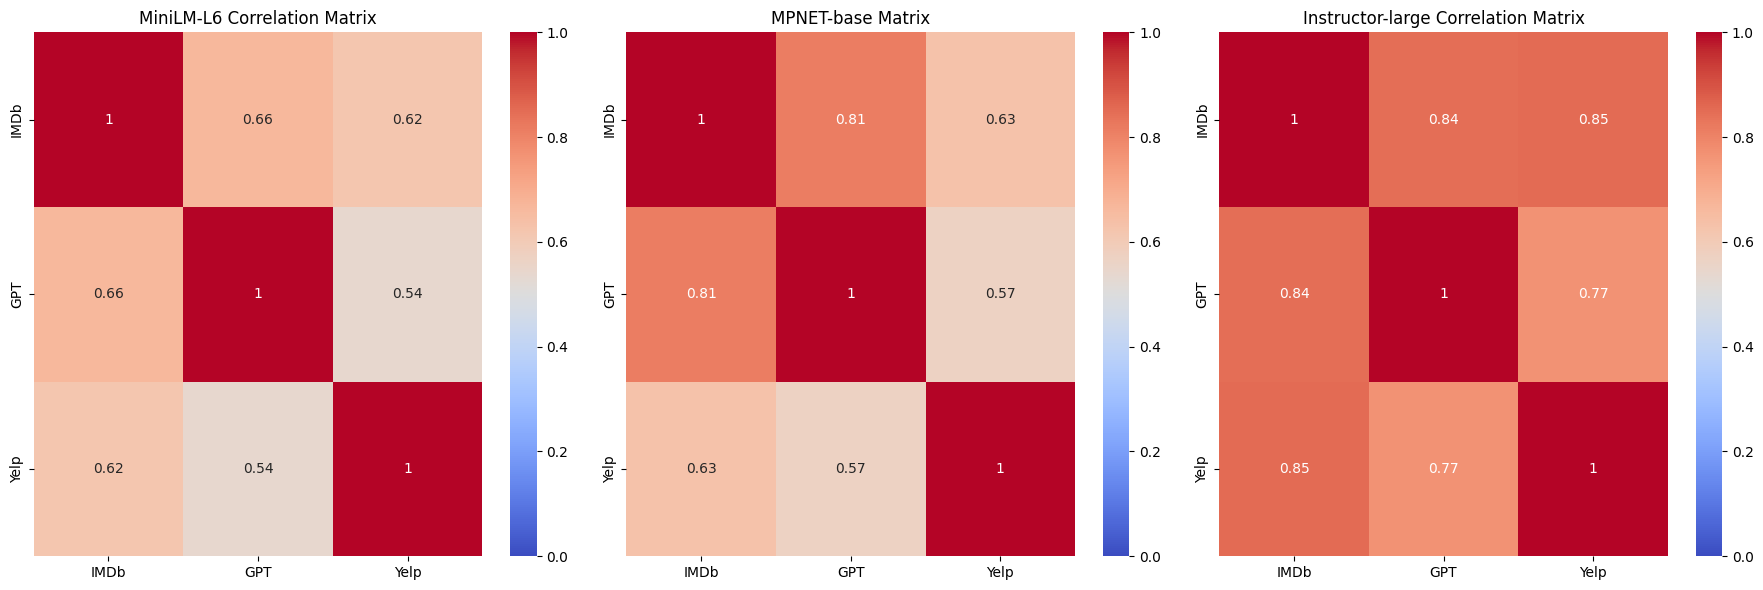

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrices for each dataset (replace with actual data if needed)
small_data = {
    'IMDb': [1, 0.6649, 0.6182],
    'GPT': [0.6649, 1, 0.5422],
    'Yelp': [0.6182, 0.5422, 1]
}

base_data_1 = {
    'IMDb': [1, 0.8143, 0.6299],
    'GPT': [0.8143, 1, 0.5686],
    'Yelp': [0.6299, 0.5686, 1]
}

base_data_2 = {
    'IMDb': [1, 0.8443, 0.8533],
    'GPT': [0.8443, 1, 0.7661],
    'Yelp': [0.8533, 0.7661, 1]
}

# Create DataFrames
df_small = pd.DataFrame(small_data, index=['IMDb', 'GPT', 'Yelp'])
df_base_1 = pd.DataFrame(base_data_1, index=['IMDb', 'GPT', 'Yelp'])
df_base_2 = pd.DataFrame(base_data_2, index=['IMDb', 'GPT', 'Yelp'])

# Plotting the correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(df_small, annot=True, cmap='coolwarm', ax=axes[0], vmin=0, vmax=1)
axes[0].set_title('MiniLM-L6 Correlation Matrix')

sns.heatmap(df_base_1, annot=True, cmap='coolwarm', ax=axes[1], vmin=0, vmax=1)
axes[1].set_title('MPNET-base Matrix')

sns.heatmap(df_base_2, annot=True, cmap='coolwarm', ax=axes[2], vmin=0, vmax=1)
axes[2].set_title('Instructor-large Correlation Matrix')

plt.tight_layout()
plt.show()


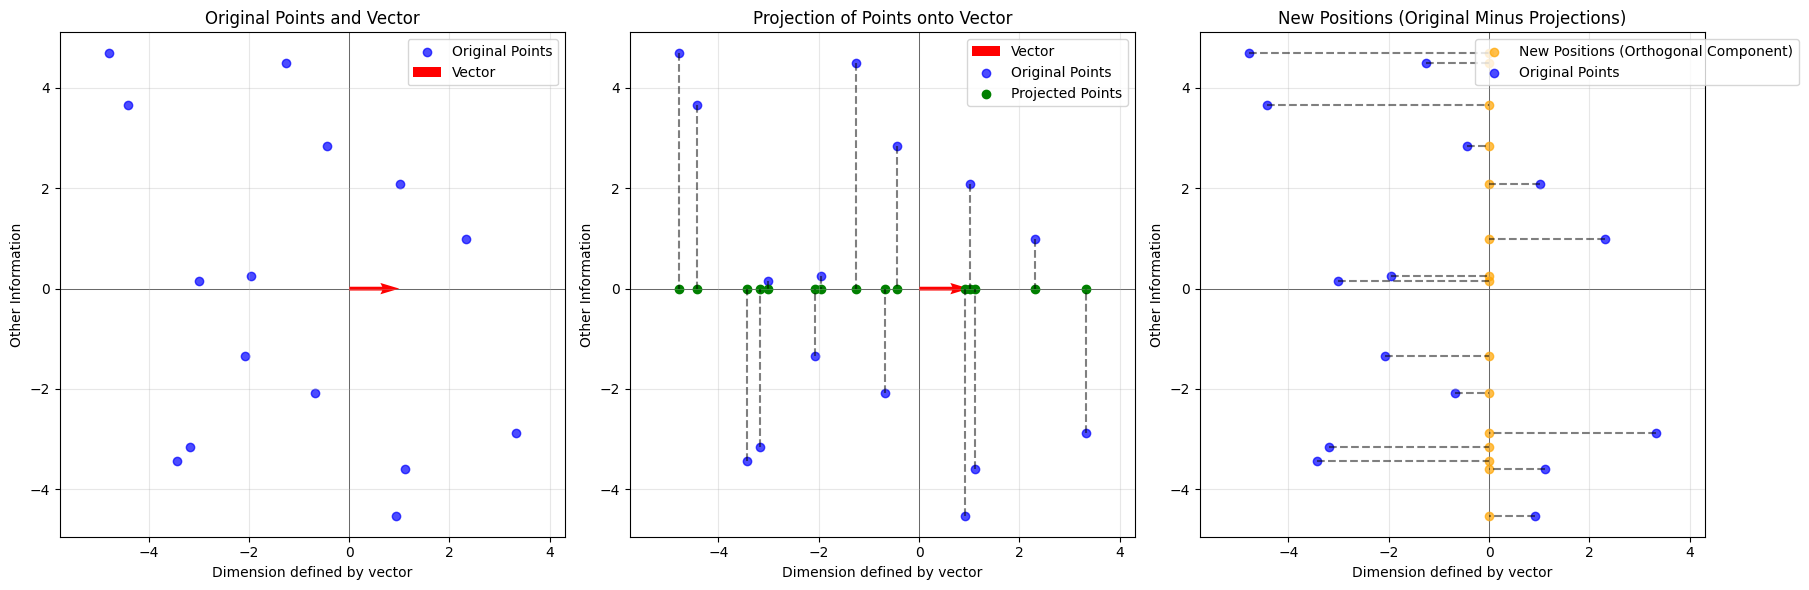

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points in 2D space
np.random.seed(42)  # For reproducibility
num_points = 15
points = np.random.rand(num_points, 2) * 10 - 5  # Random points in range [-5, 5]

# Define the vector for projection
vector = np.array([1, 0])  # Example vector (not normalized)
vector_unit = vector / np.linalg.norm(vector)  # Normalize the vector

# Compute projections of points onto the vector
projections = np.dot(points, vector_unit)[:, None] * vector_unit

# Compute the new positions (original points minus their projections)
new_positions = points - projections

# Plot 1: Random points and the vector
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.axhline(0, color='black', linewidth=0.5, zorder = 1)
plt.axvline(0, color='black', linewidth=0.5, zorder = 1)
plt.scatter(points[:, 0], points[:, 1], color='blue', alpha=0.7, label='Original Points')
plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector')

plt.grid(alpha=0.3)
plt.legend()
plt.title("Original Points and Vector")
plt.xlabel("Dimension defined by vector")
plt.ylabel("Other Information")
plt.axis("equal")

# Plot 2: Projections of points onto the vector
plt.subplot(1, 3, 2)
plt.axhline(0, color='black', linewidth=0.5, zorder = 1)
plt.axvline(0, color='black', linewidth=0.5, zorder = 1)
plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector')
plt.scatter(points[:, 0], points[:, 1], color='blue', alpha=0.7, label='Original Points')
plt.scatter(projections[:, 0], projections[:, 1], color='green', alpha=1, label='Projected Points')


for p, proj in zip(points, projections):
    plt.plot([p[0], proj[0]], [p[1], proj[1]], 'k--', alpha=0.5)  # Lines connecting original points to projections
plt.grid(alpha=0.3)
plt.legend()
plt.title("Projection of Points onto Vector")
plt.xlabel("Dimension defined by vector")
plt.ylabel("Other Information")
plt.axis("equal")

# Plot 3: New positions after subtracting projections
plt.subplot(1, 3, 3)
plt.axhline(0, color='black', linewidth=0.5, zorder=1)
plt.axvline(0, color='black', linewidth=0.5, zorder=1)
plt.scatter(new_positions[:, 0], new_positions[:, 1], color='orange', alpha=0.7, label='New Positions (Orthogonal Component)')
plt.scatter(points[:, 0], points[:, 1], color='blue', alpha=0.7, label='Original Points')


for p, proj in zip(points, new_positions):
    plt.plot([p[0], proj[0]], [p[1], proj[1]], 'k--', alpha=0.5)  # Lines connecting original points to projections

plt.grid(alpha=0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # Adjust legend position
plt.title("New Positions (Original Minus Projections)")
plt.xlabel("Dimension defined by vector")
plt.ylabel("Other Information")
plt.axis("equal")

# Show all plots
plt.tight_layout()